In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_excel("/Users/macbook/Desktop/ironhack/anova_lab_data.xlsx", sheet_name='data_collected')
data

,Power,Etching Rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71
5,200 W,9.20
6,160 W,6.22
7,180 W,5.98
8,200 W,7.90
9,160 W,6.01


In [10]:
data.sort_values(by="Power ")

,Power,Etching Rate
0,160 W,5.43
3,160 W,5.71
6,160 W,6.22
9,160 W,6.01
12,160 W,5.59
1,180 W,6.24
4,180 W,6.71
7,180 W,5.98
10,180 W,5.66
13,180 W,6.60


In [6]:
data.columns


Index(['Power ', 'Etching Rate'], dtype='object')

In [11]:
data.describe()


,Etching Rate
count,15.000000
mean,6.782667
std,1.228643
min,5.430000
25%,5.845000
50%,6.240000
75%,7.725000
max,9.200000


In [15]:
data.dtypes


Power            object
Etching Rate    float64
dtype: object

In [16]:
data.groupby('Power ').agg(np.mean)

,Etching Rate
Power,
160 W,5.792
180 W,6.238
200 W,8.318


Null hypothesis - changing the power of the plasma beam has no effect on the etching rate by the machine - the same mean.
Alternate hypothesis - changing the power of the plasma beam has effect on the etching rate by the machine - different mean.(there is at least one power with the mean different then the others)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

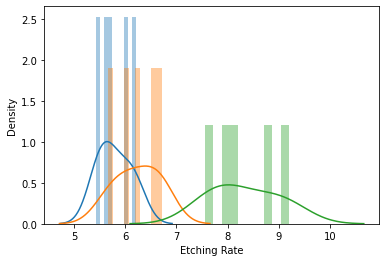

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
for val in data["Power "].unique():
    sns.distplot(data[data["Power "] == val]["Etching Rate"], bins=10)
plt.show()    

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:

data.rename(columns={'Etching Rate': 'Etching_Rate', 'Power ': 'Power'}, inplace=True)
data.columns

Index(['Power', 'Etching_Rate'], dtype='object')

In [34]:
model = ols('Etching_Rate ~ C(Power)', data=data).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Power),2.0,18.176653,9.088327,36.878955,0.000008
Residual,12.0,2.957240,0.246437,NaN,NaN


For the factor C(Power), the F-statistic is 36.878955, and the p-value is very small (0.000008), much lower than the significance level of 0.05. This indicates strong evidence against the null hypothesis, suggesting that the power level significantly affects the response variable.


In [35]:
data.pivot(columns="Power").describe()

Etching_Rate                    
Power        160 W     180 W     200 W
count     5.000000  5.000000  5.000000
mean      5.792000  6.238000  8.318000
std       0.319875  0.434304  0.669604
min       5.430000  5.660000  7.550000
25%       5.590000  5.980000  7.900000
50%       5.710000  6.240000  8.150000
75%       6.010000  6.600000  8.790000
max       6.220000  6.710000  9.200000

In [36]:
from scipy.stats import ttest_ind

In [37]:
power_a=data[data["Power"] == "200 W"]["Etching_Rate"]
for power in data["Power"].unique():
    power_b=data[data["Power"] == power]["Etching_Rate"]
    print(power, ttest_ind(power_a, power_b))

160 W Ttest_indResult(statistic=7.611403634613074, pvalue=6.237977344615716e-05)
180 W Ttest_indResult(statistic=5.827496614588661, pvalue=0.0003926796476049085)
200 W Ttest_indResult(statistic=0.0, pvalue=1.0)


In [38]:
power_a

2     8.79
5     9.20
8     7.90
11    8.15
14    7.55
Name: Etching_Rate, dtype: float64